# Pixel walker
###### version 1

By: Job Vink, Michiel van Soest en Jelte Molenaar

In dit notebook word de basis gelegd voor het bestaande algoritme. Hier wordt getest of door naar de kleur veranding in de afbeelding de kade herkent kan worden. Er wordt een afbeelding gebruikt die niet voorkomt in de dataset omdat op het moment van schrijven van de code deze nog niet beschikbaar was. 

## Importeren
In de eerste cel van deze notebook worden verschillende modules als Numpy, Pillow en matplotlib geimporteerd. De cel erna wordt de desbetreffende afbeelding geopend en gelijk geconvert naar een RGB image. Nadat het is geconvert wordt de afbeelding met behulp van numpy in een object met de pixelwaarden omgezet.  

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [2]:
# inladen van de image en vertalen naar een array van rgb waardes
image = Image.open('test.png', 'r').convert('RGB')
image_data = np.array(image.getdata()).reshape((image.height, image.width, 3))

## Variabelen
In de cel hieronder worden drie verschillende waarden als veriabele opgeslagen. 

Y_POS = De hoogt waar er gekeken gaat worden naar de gemiddelde pixel waarde 

SAMPLE_SIZE = De hoeveelheid pixel breete waarmee wordt gekeken in de afbeelding 

In [ ]:
Y_POS = 290
SAMPLE_SIZE = 8

## Functie | slicen sample
Met de onderstaande functie wordt de gemiddelde waarde van de pixel berekend. 

In [3]:
# vertalen van ruwe data naar een gemiddelde door de sample te slicen, en de mean van de waars
def get_average(data, x, y, size):
    start_x = max(int(y - size / 2), 0)
    start_y = max(int(x - size / 2), 0)
    end_x = min(int(y + size / 2), data.shape[1])
    end_y = min(int(x + size / 2), data.shape[1])
    samples = data[start_x:end_x, start_y:end_y]
    sample_stream = samples.transpose(2, 0, 1).reshape(3, -1)
    return np.mean(sample_stream, axis=1)

baseline = get_average(image_data, 400, Y_POS, 16)

## Visualisatie lijn 
In de cel hieronder wordt de afbeelding gevisualiseerd. Hierbij is plt.hlines toegevoegd. Deze functie zorgt er voor dat er een horizotale lijn op de hoogte van Y_POS geplot wordt.   

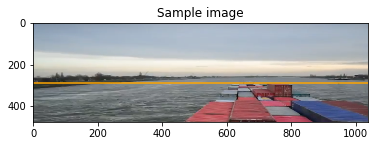

In [4]:
plt.subplot(2, 1, 1)
plt.imshow(image_data, aspect='auto')
plt.hlines([Y_POS], xmin=0, xmax=image.width, colors=['orange'])
plt.margins(x=0)
plt.title('Sample image')

## Gemiddelde gehele foto
Met de onderstaande cel wordt het gemiddelde get_average van de gehele afbeelding berkend. 

In [5]:
# loop die loopt van pos 400x300 naar 200x300
average_pixel_values = []
distances_to_baseline = []

for i in range(0, image.width, 1):
    y = Y_POS
    average = get_average(image_data, i, y, SAMPLE_SIZE)
    average_pixel_values.append(average)
    distances_to_baseline.append(np.linalg.norm(average - baseline))

average_pixel_rgb = np.transpose(average_pixel_values)

## Visualisatie euclidean distance
Nadat de gemiddelde pixel waarde bepaald is kan het figuur geplot worden. Dit gebeurt in de cel hieronder. Hierbij wordt als eerste de orginele afbeelding met de oranje line door de afbeelding geplot. Daaronder wordt de euclidean distance bij de desbetreffende pixel geplot. Hierin is duidelijk een verschil te zien waar het land eindigd en het water start. 

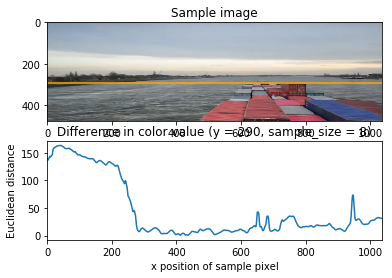

In [8]:
plt.subplot(2, 1, 1)
plt.imshow(image_data, aspect='auto')
plt.hlines([Y_POS], xmin=0, xmax=image.width, colors=['orange'])
plt.margins(x=0)
plt.title('Sample image')

plt.subplot(2, 1, 2)
plt.plot(distances_to_baseline)

plt.title('Difference in color value (y = {}, sample_size = {})'.format(Y_POS, SAMPLE_SIZE))
plt.ylabel('Euclidean distance')
plt.xlabel('x position of sample pixel')
plt.margins(x=0)

plt.show()
plt.close()